In [4]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


data = pd.read_csv('E:/databag/bag2/SpectralClustering聚类(2到7)结果(sqrt非线性变化).csv',index_col=0)

data1=data.drop('4个簇',axis=1)
data1
data2=data1.drop('5个簇',axis=1)
data3=data2.drop('6个簇',axis=1)
data4=data3.drop('7个簇',axis=1)
data5=data4.drop('3个簇',axis=1)
data6=data5.drop('2个簇',axis=1)
data6

,性别,肺活量,身高(cm),体重(kg),谷丙转氨酶(ALT)(U/L),总胆红素(TBIL)(umol/L),平均血小板体积(MPV)(fl),白细胞计数(WBC)(10^9/L),中性粒细胞绝对值(NE#)(10^9/L),中性粒细胞比值(NE%)(%),...,平均红细胞血红蛋白浓度(MCHC)(g/L),红细胞分布宽度变异系数(RDW_CV)(%),血小板计数(PLT)(10^9/L),血小板分布宽度(PDW)(%),大血小板比率(P-LCR)(%),中间细胞百分比(MID%)(%),中间细胞绝对值(MID#)(10^9/L),红细胞分布宽度(RDW-SD)(%),血压-高(mmHg),血压-低(mmHg)
0,0.0,0.731357,0.911272,0.540848,0.258144,0.259064,0.200000,0.399275,0.384111,0.686655,...,0.920504,0.462910,0.472188,0.479899,0.269116,0.483887,0.324443,0.500000,0.789593,0.562731
1,0.0,0.628768,0.934976,0.521641,0.267642,0.103151,0.787401,0.466252,0.404888,0.628691,...,0.847088,0.422577,0.486079,0.396958,0.564009,0.701914,0.512989,0.676123,0.789593,0.670820
2,0.0,0.731357,0.911272,0.589015,0.143842,0.094885,0.707107,0.399275,0.350643,0.616163,...,0.828868,0.387298,0.492878,0.577350,0.596648,0.655186,0.458831,0.812843,0.842542,0.658281
3,0.0,0.590624,0.932046,0.565445,0.222840,0.126333,0.883176,0.350982,0.300273,0.588841,...,0.598981,0.348466,0.499584,0.220193,0.985692,0.608877,0.397360,0.651920,0.761739,0.658281
4,0.0,0.715282,0.934976,0.577350,0.241287,0.246102,0.616441,0.473960,0.495885,0.823119,...,0.682385,0.327327,0.487788,0.738549,0.705727,0.648074,0.512989,0.836660,0.801234,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,1.0,0.609994,0.934976,0.628138,0.135147,0.185517,0.707107,0.659380,0.718605,0.956605,...,0.886713,0.514087,0.472188,0.655975,0.708091,0.452635,0.397360,0.751190,0.857069,0.816497
4047,0.0,0.457496,0.908265,0.633530,0.112058,0.115148,0.547723,0.147442,0.256074,0.713875,...,0.886713,0.632456,0.499584,0.603023,0.565981,0.580160,0.229416,0.694365,0.741204,0.866025
4048,0.0,0.664726,0.911272,0.622700,0.202721,0.116033,0.424264,0.727314,0.671431,0.776652,...,0.786334,0.849370,0.686208,0.603023,0.460108,0.694929,0.725476,0.874234,0.789593,0.752773
4049,0.0,0.431331,0.899185,0.521641,0.154831,0.189230,0.529150,0.489010,0.487550,0.768691,...,0.869325,0.654654,0.484365,0.587754,0.530412,0.593049,0.458831,0.900397,0.662021,0.500000


In [5]:
#存放设置不同簇数时的SSE值
sse_list =[]
# 轮廓系数
silhouettes = []
#Calinski-Harabaz Index
scores = []
#Davies-Bouldin Index
davies_list = []
# 循环设置不同的聚类簇数
for i in range(4, 10):
    y_pre = np.array(data.iloc[:,23+i])
    # 轮廓系数
    silhouette = metrics.silhouette_score(data4, y_pre, metric='euclidean')
    silhouettes.append(silhouette)
    #Davies-Bouldin Index
    davies_list.append(davies_bouldin_score(data4,y_pre))
    #Calinski-Harabaz Index
    score = calinski_harabasz_score(data4,y_pre)
    scores.append(score)

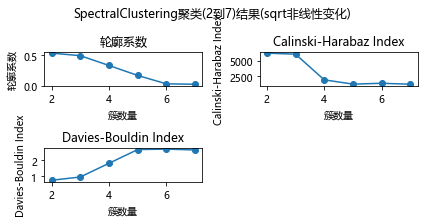

In [6]:

# 绘制轮廓系数曲线
plt.subplot(321)
plt.title('轮廓系数')
plt.plot(range(2, 8), silhouettes, marker='o')
plt.xlabel('簇数量')
plt.ylabel('轮廓系数')
# 绘制Calinski-Harabaz Index曲线
plt.subplot(322)
plt.title('Calinski-Harabaz Index')
plt.plot(range(2, 8),scores , marker='o')
plt.xlabel('簇数量')
plt.ylabel('Calinski-Harabaz Index')

# 绘制Davies-Bouldin Index曲线
plt.subplot(323)
plt.title('Davies-Bouldin Index')
plt.plot(range(2, 8),davies_list, marker='o')
plt.xlabel('簇数量')
plt.ylabel('Davies-Bouldin Index')

plt.suptitle('SpectralClustering聚类(2到7)结果(sqrt非线性变化)')
plt.tight_layout()
plt.show()